In [1]:
data<-read.csv("menu.csv")
str(data)

'data.frame':	260 obs. of  24 variables:
 $ Category                     : Factor w/ 9 levels "Beef & Pork",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Item                         : Factor w/ 260 levels "1% Low Fat Milk Jug",..: 76 77 228 229 230 245 12 11 14 13 ...
 $ Serving.Size                 : Factor w/ 107 levels "1 carton (236 ml)",..: 55 54 42 69 69 83 63 72 65 73 ...
 $ Calories                     : int  300 250 370 450 400 430 460 520 410 470 ...
 $ Calories.from.Fat            : int  120 70 200 250 210 210 230 270 180 220 ...
 $ Total.Fat                    : num  13 8 23 28 23 23 26 30 20 25 ...
 $ Total.Fat....Daily.Value.    : int  20 12 35 43 35 36 40 47 32 38 ...
 $ Saturated.Fat                : num  5 3 8 10 8 9 13 14 11 12 ...
 $ Saturated.Fat....Daily.Value.: int  25 15 42 52 42 46 65 68 56 59 ...
 $ Trans.Fat                    : num  0 0 0 0 0 1 0 0 0 0 ...
 $ Cholesterol                  : int  260 25 45 285 50 300 250 250 35 35 ...
 $ Cholesterol....Daily.Value.  : int  8

In [ ]:
#we can do scatter plots and corrplots to check relation among variables

In [2]:
require(lattice)

Loading required package: lattice



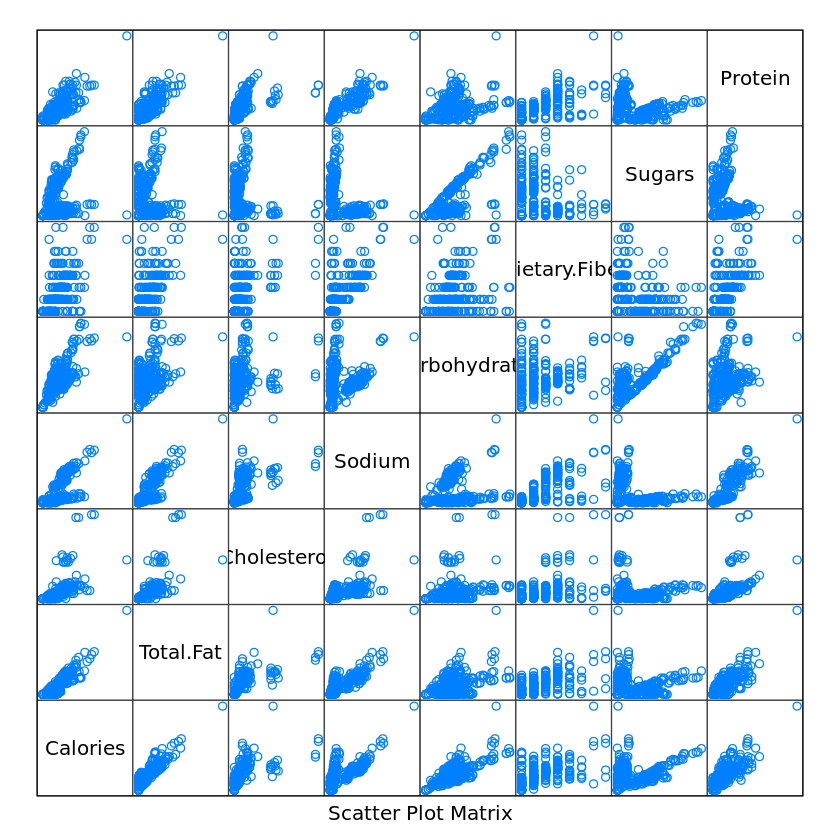

In [3]:
splom(~data[c(4,6,11,13,15,17,19,20)],groups = NULL, data = data, axis.line.tck = 0, axis.text.alpha = 0)

In [4]:
install.packages("corrplot")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [5]:
require(corrplot)

Loading required package: corrplot

corrplot 0.84 loaded



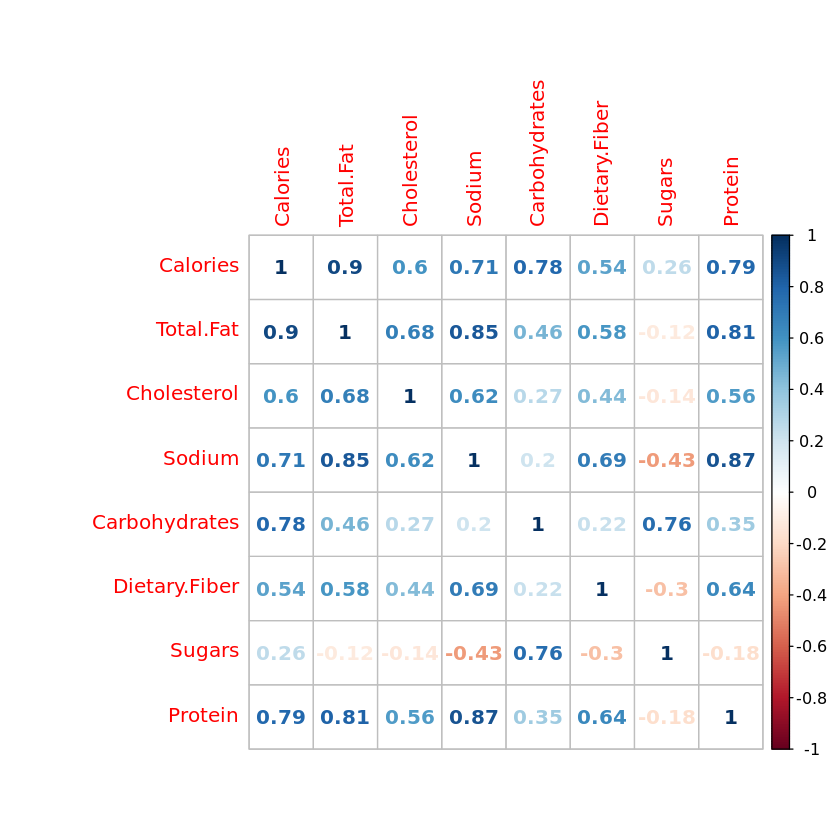

In [6]:
cr <- cor(data[c(4,6,11,13,15,17,19,20)])
corrplot(cr,method = "number")

In [ ]:
#Total fat has a high corelation = 0.9, 
#followed by protein = 0.79 and 
#carbohydrates = 0.78

In [ ]:
#Split the dataset into train and test

In [8]:
install.packages("caTools")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [9]:
library(caTools)

In [10]:
set.seed(2)

In [11]:
split <- sample.split(data$Calories,SplitRatio = 0.70)
train <- subset(data,split == "TRUE")
test <- subset(data, split == "FALSE")


In [12]:
require(dplyr)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




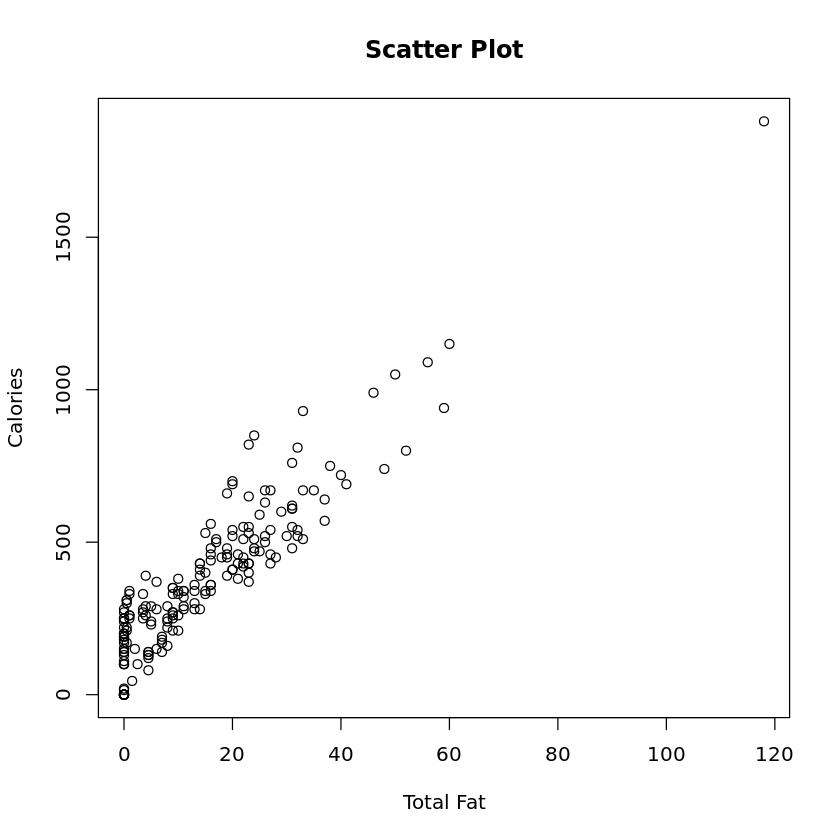

In [13]:
plot(train$Total.Fat,train$Calories,main = "Scatter Plot",xlab = "Total Fat", ylab = "Calories")

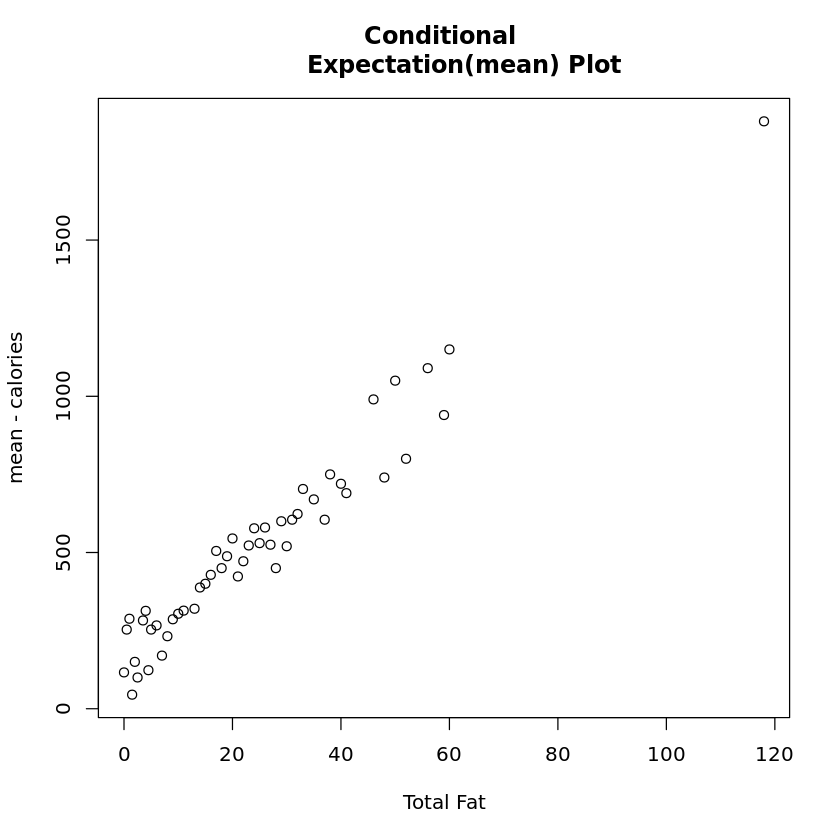

In [15]:
#Conditional Expectation Plot
dataexp <- summarise(group_by(train,Total.Fat),calmean = mean(Calories))
plot(dataexp$Total.Fat,dataexp$calmean,xlab = "Total Fat",ylab = "mean - calories",main = "Conditional 
     Expectation(mean) Plot")

# Linear Regression Model

In [ ]:
#Linear regression model between calories and total fat.
#dependent variable--Calories
#independent varible--Total fat

In [17]:
model1 <- lm(Calories~Total.Fat,data = train)

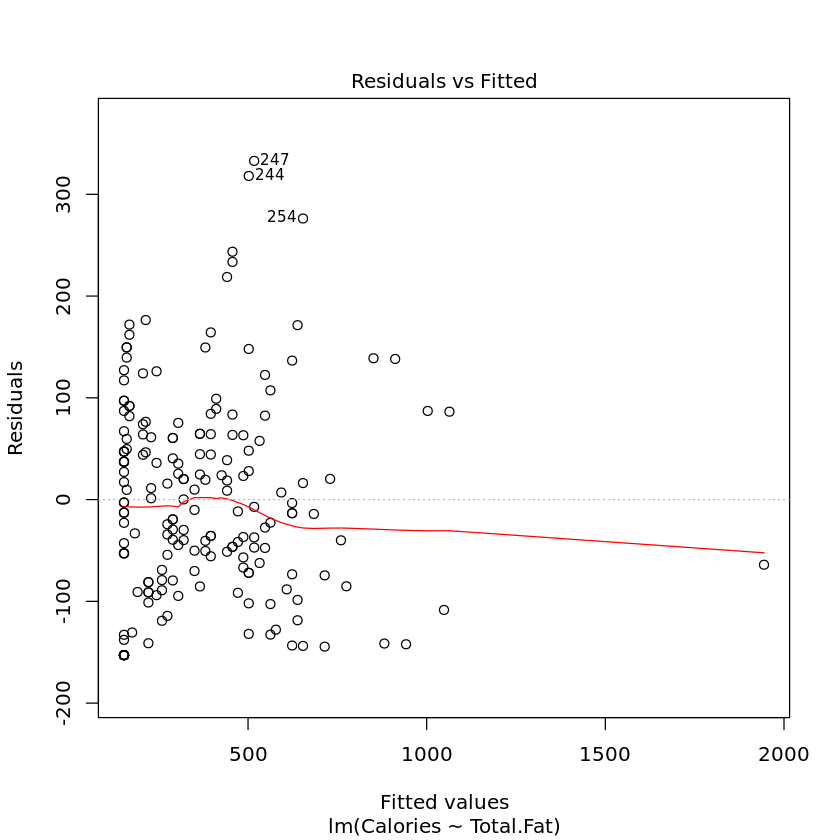

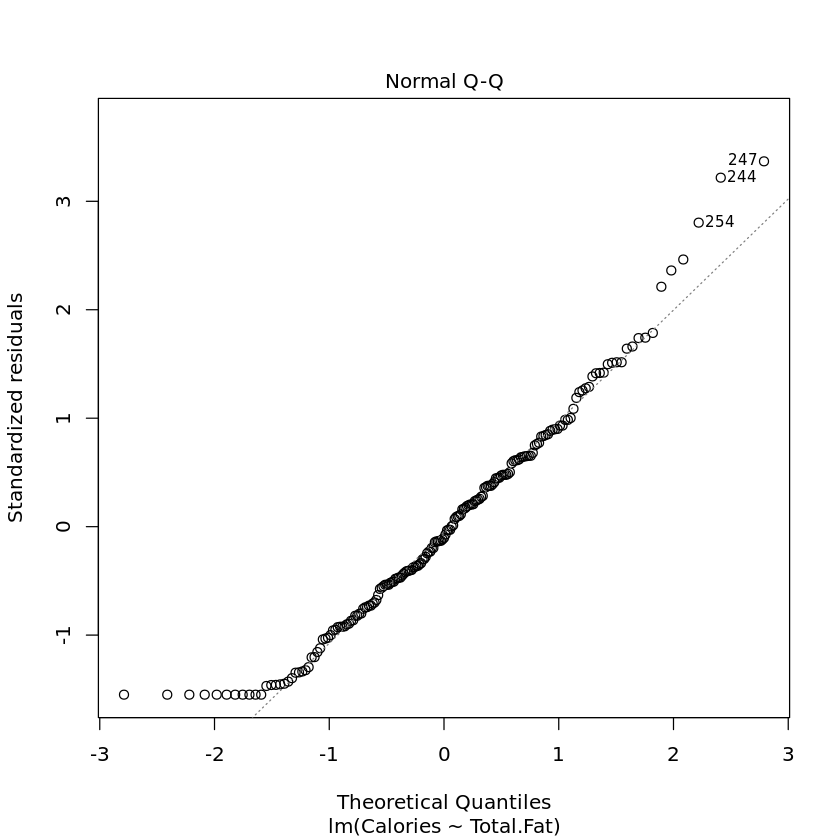

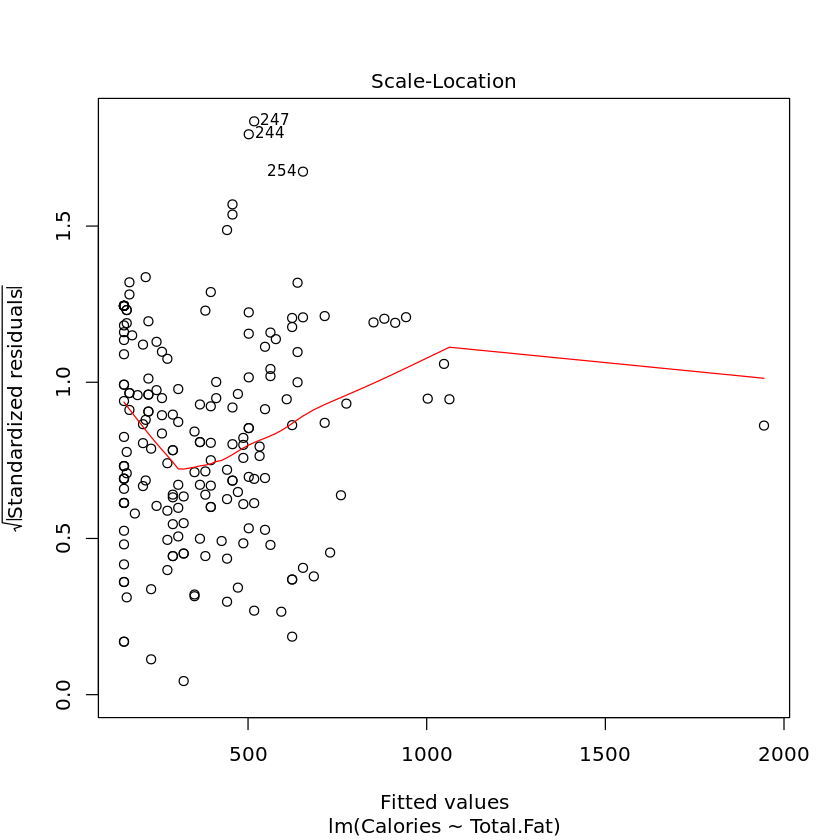

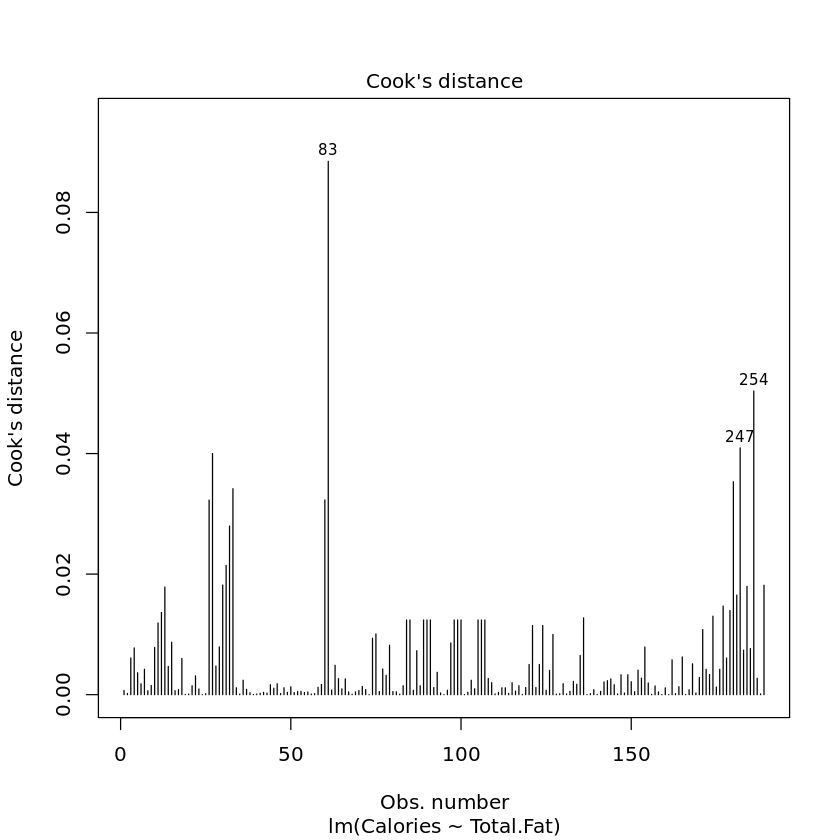

In [19]:
plot(model1, which = 1:4)

In [20]:
summary(model1)


Call:
lm(formula = Calories ~ Total.Fat, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-152.84  -71.97  -10.17   63.21  332.85 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  152.838     10.026   15.24   <2e-16 ***
Total.Fat     15.180      0.469   32.37   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 99.18 on 187 degrees of freedom
Multiple R-squared:  0.8485,	Adjusted R-squared:  0.8477 
F-statistic:  1048 on 1 and 187 DF,  p-value: < 2.2e-16


In [ ]:
#value of intercept = 152.838 and value of slope = 15.180
#Both the values are significant R-squared = 85%. 
#The overall p-value is also significant
#The linear equation to predict calories : 
    #Calories = 152.838 + 15.180*total fat

# Multiple Regression Model.

In [ ]:
#From corrplots we found out that total fat, protein and carbohydrates are highly corelated.
#depent variable--Calories
#independent variables--Total Fat + Protein + Carbohydrates

In [21]:
model <- lm(Calories~ Total.Fat + Protein + Carbohydrates, data = train)

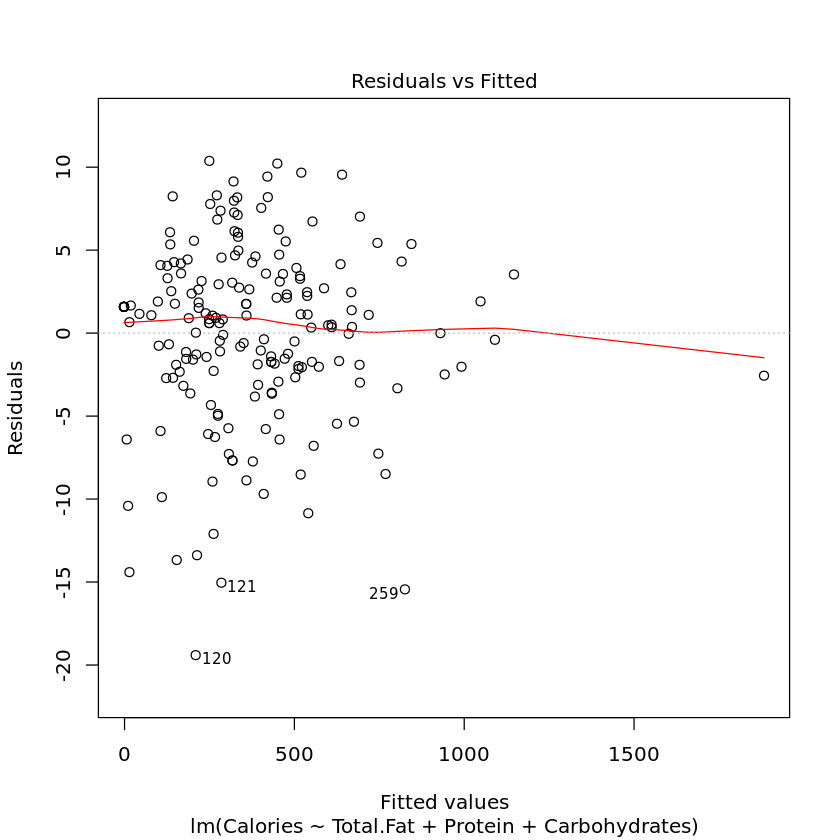

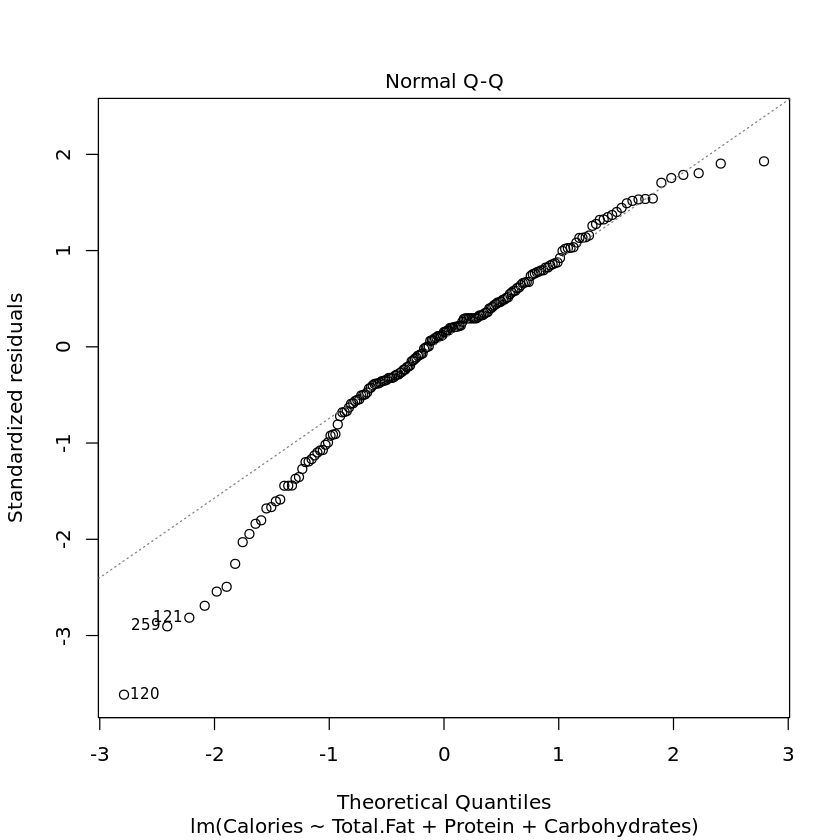

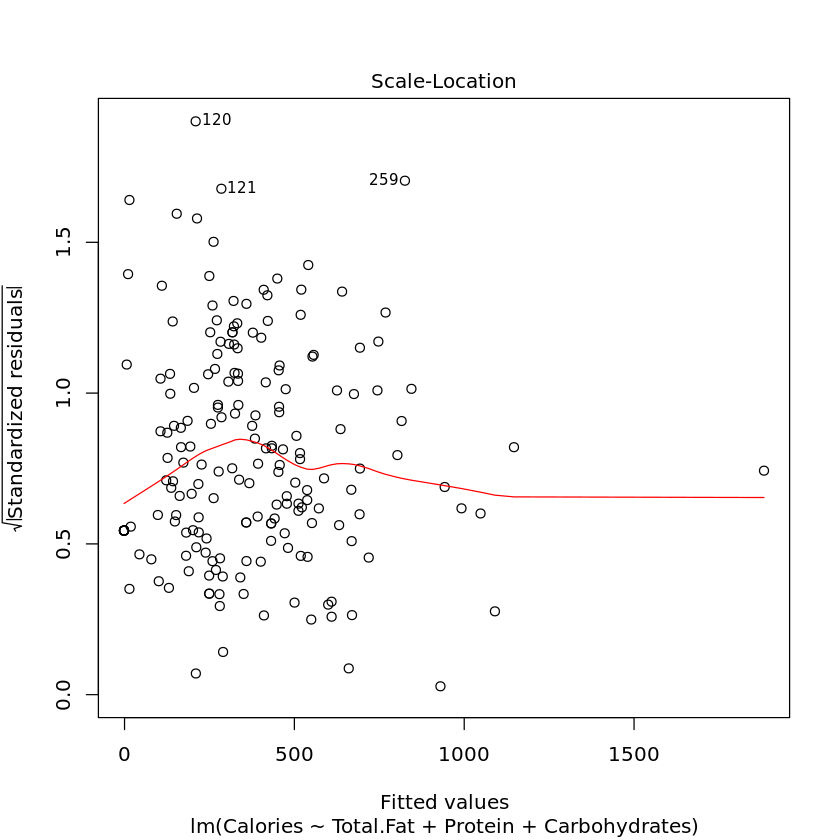

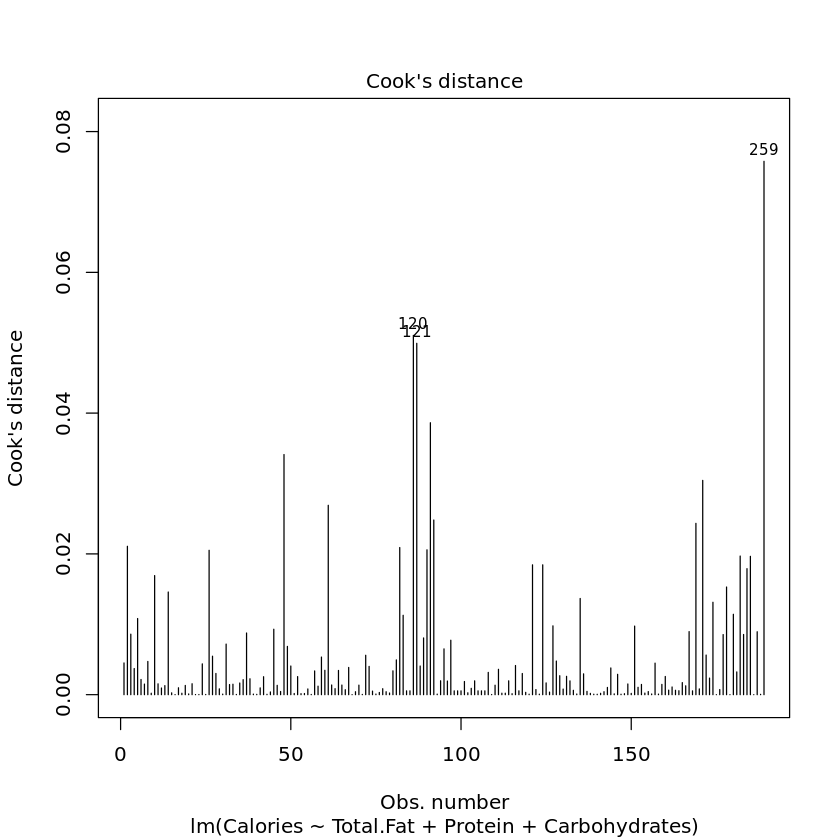

In [22]:
plot(model, which = 1:4)

In [23]:
summary(model)


Call:
lm(formula = Calories ~ Total.Fat + Protein + Carbohydrates, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.4031  -2.4901   0.8274   3.4343  10.3781 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.58186    0.83800  -1.888   0.0606 .  
Total.Fat      9.03996    0.04810 187.955   <2e-16 ***
Protein        3.99646    0.06007  66.527   <2e-16 ***
Carbohydrates  3.98085    0.01621 245.595   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.41 on 185 degrees of freedom
Multiple R-squared:  0.9996,	Adjusted R-squared:  0.9995 
F-statistic: 1.382e+05 on 3 and 185 DF,  p-value: < 2.2e-16


In [ ]:
#R-squared value is approx equal to 1. These three variables almost explains 100% of variance in calories.